<h1 style="text-align: center;">Classifiez automatiquement des biens de consommation</h1>

<center>**Ce notebook contient les résultat du test de **l'API OpenFoodFacts**</center>

- La collecte de produits à base de **champagne**
- Il contient également, l'extraction de la liste des **10 premiers produits** à base de **champagne**
- Les  données relatives pour chaque produits (#10) à base de **champagne** avec les features suivantes:
1. **foodId**
2. **label**
3. **category**
4. **foodContentsLabel**
5. **image**

### Defintion de l'API

<center>**API : Signifie Application Interface Programming**</center>
- C'est une Interface permettant à des applications ou des systèmes de communiquer entre eux en échangeant des données via des requêtes et des réponses, souvent au format JSON ou XML, sans nécessiter d'interface utilisateur.


**Endpoints principaux de l'API OpenFoodFacts**

**Méthodes HTTP utilisées**
| **Méthode HTTP** | **Description** | **Exemple d'utilisation** |
|-----------------|----------------|---------------------------|
| **`GET`** | Récupérer des données depuis l'API (lecture seule) | `requests.get(url, params=params)` |
| **`POST`** | Envoyer de nouvelles données à l'API (ajout de produits, images, etc.) | `requests.post(url, data=data)` |
| **`PUT`** | Modifier une ressource existante dans l'API | `requests.put(url, data=updated_data)` |
| **`DELETE`** | Supprimer une ressource de l'API | `requests.delete(url)` |

---

**Liste des Endpoints de l'API OpenFoodFacts**
| **Endpoint** | **Description** | **Exemple d'utilisation** |
|-------------|---------------|-------------------------|
| **`/api/v2/search`** | Recherche de produits selon des critères spécifiques | [Lien](https://world.openfoodfacts.org/api/v2/search?categories=champagne&page_size=10) |
| **`/api/v2/product/{code}`** | Récupérer les détails d'un produit spécifique avec son code-barres | [Lien](https://world.openfoodfacts.org/api/v2/product/3049610004104.json) |
| **`/api/v2/category/{category}`** | Récupérer tous les produits d'une catégorie spécifique | [Lien](https://world.openfoodfacts.org/api/v2/category/champagnes.json) |
| **`/api/v2/image/upload`** | Envoyer une image pour un produit (requiert une clé API) | POST request nécessaire |
| **`/api/v2/contributors`** | Voir les contributeurs de la base de données | [Lien](https://world.openfoodfacts.org/api/v2/contributors.json) |

- **API** => **Application Interface Programming**
- **JSON**=> (**JavaScript Object Notation**) est un format de données universel utilisé pour échanger des informations entre serveurs et applications.
- **HTTP (HyperText Transfer Protocol)** est le protocole de communication qui permet aux clients (navigateur, script Python, API, etc.) d'envoyer des requêtes aux serveurs pour récupérer ou envoyer des données. Le corps de réponse est souvent JSON.
  

Exemple JSON:
- {
    "products": [
        {
            "code": "3049610004104",
            "product_name": "Champagne Veuve Clicquot",
            "categories": "Boissons, Boissons alcoolisées, Vins, Champagnes",
            "ingredients_text": "Champagne, Contient des sulfites",
            "image_url": "https://images.openfoodfacts.org/images/products/304/961/000/4104/front_fr.39.400.jpg"
        }
    ]
}

**_Référence documentaire utilisée :OpenFoodFacts API - Uploading & Downloading Photos_**


### Définition de la requête et extraction des produits à base de champagne dans un fichier csv

In [ ]:

# Définition de l'URL et des paramètres de la requête API


# Définition de l'URL et des paramètres de la requête API
# L’URL "https://world.openfoodfacts.org/cgi/search.pl" est un point d’accès (endpoint).
# Elle ne nécessite pas d'authentification
import requests  # Bibliothèque pour effectuer des requêtes HTTP
import csv  # Bibliothèque pour écrire dans des fichiers CSV


# Définition de l'URL et des paramètres de la requête API

url = "https://world.openfoodfacts.org/cgi/search.pl"  # URL de l'API OpenFoodFacts

params = {
    "search_terms": "champagne",  # Recherche des produits contenant "champagne"
    "fields": "code,product_name,categories,ingredients_text,image_url",  # Champs à récupérer
    "page_size": 60,  # Nombre maximum de produits à récupérer (60 ici)
    "json": 1  # Format de réponse attendu : JSON
}


# Effectuer la requête API

response = requests.get(url, params=params)  # Envoi d'une requête GET avec les paramètres définis

if response.status_code == 200:  # Vérification si la requête a réussi (code HTTP 200)
    data = response.json()  # Conversion de la réponse en format JSON
    products = data.get("products", [])  # Récupération de la liste des produits dans la clé "products"

    print(f"{len(products)} produits récupérés avant filtrage.")  # Affichage du nombre total de produits récupérés


    # Filtrer les produits valides

    valid_products = [
        p for p in products
        if p.get("ingredients_text") and "Champagne" in p.get("ingredients_text")  
        # Vérifie que "Champagne" est mentionné dans les ingrédients (foodContentsLabel)
        and ("Champagne" in p.get("categories", "") or "Épicerie fine" in p.get("categories", ""))  
        # Vérifie que le produit est dans une catégorie liée au champagne ou à l'épicerie fine
        and p.get("product_name")  # Vérifie que le nom du produit est renseigné
        and p.get("image_url")  # Vérifie que l'image du produit est disponible
    ]

    print(f"{len(valid_products)} produits valides après filtrage.")  # Affiche le nombre de produits valides après filtrage

    # Vérifier si au moins 10 produits valides sont trouvés

    if len(valid_products) < 10:  # Si moins de 10 produits valides sont trouvés
        print(f"Erreur : Seulement {len(valid_products)} produits valides trouvés. Impossible d'extraire 10 résultats complets.")
    else:

        # Sauvegarde dans un fichier CSV
 
        output_file = "produits_champagne_final.csv"  # Nom du fichier CSV à créer

        with open(output_file, mode="w", newline="", encoding="utf-8") as file:  
            # Ouverture du fichier en mode écriture avec encodage UTF-8 pour gérer les caractères spéciaux
            writer = csv.writer(file)  # Création d'un objet CSV writer
            writer.writerow(["foodId", "label", "category", "foodContentsLabel", "image"])  
            # Écriture des en-têtes des colonnes dans le fichier CSV

            for product in valid_products[:10]:  # Prendre les 10 premiers produits valides
                writer.writerow([
                    product["code"],                # foodId : Identifiant unique du produit
                    product["product_name"],        # label : Nom du produit
                    product["categories"],          # category : Catégories associées au produit
                    product["ingredients_text"],    # foodContentsLabel : Ingrédients du produit
                    product["image_url"]            # image : URL de l'image du produit
                ])

        print(f"Fichier '{output_file}' créé avec succès. 10 produits valides enregistrés !")  
        # Confirmation que le fichier a été créé avec succès

else:
    print(f"Erreur API : {response.status_code}. Vérifiez l'URL ou les paramètres.")  
    # Message d'erreur si la requête API échoue (par exemple, problème réseau ou mauvais paramètres)


60 produits récupérés avant filtrage.
13 produits valides après filtrage.
Fichier 'produits_champagne_final.csv' créé avec succès. 10 produits valides enregistrés !


### Vérrification complémentaire de l' extraction de produits à base de champagne

In [34]:
#Lecture de de l'extraction
import pandas as pd
Product_Champagne_based = pd.read_csv('produits_champagne_final.csv')

In [35]:
# Affichage des extraction
Product_Champagne_based.head(10)

,foodId,label,category,foodContentsLabel,image
0,3049610004104,Veuve Clicquot Champagne Ponsardin Brut,"Boissons et préparations de boissons, Boissons...",Champagne,https://images.openfoodfacts.org/images/produc...
1,3282946015837,Nicolas Feuillatte,"Boissons, Boissons alcoolisées, Vins, Vins fra...","Champagne, Contient des _sulfites_",https://images.openfoodfacts.org/images/produc...
2,3560070962334,Miel de la Champagne,"Petit-déjeuners, Produits à tartiner, Produits...",Miel de la Champagne (France).,https://images.openfoodfacts.org/images/produc...
3,3113910312013,Champagne Alfred Rothschild et Cie brut,"Boissons, Boissons alcoolisées, Vins, Vins fra...",Champagne brut (contient _sulfites_),https://images.openfoodfacts.org/images/produc...
4,3416181017169,"Champagne AOP, brut","Boissons, Boissons alcoolisées, Vins, Vins eff...",Champagne,https://images.openfoodfacts.org/images/produc...
5,3016570001030,75CL Champagne Brut Reserve Taittinger,"Boissons, Boissons alcoolisées, Vins, Vins fra...",Champagne brut (_sulfites_),https://images.openfoodfacts.org/images/produc...
6,3267852534122,Champagne Charles Lafitte Belle Cuvée Brut,"Boissons, Boissons alcoolisées, Vins, Vins eff...",Champagne,https://images.openfoodfacts.org/images/produc...
7,3282946104630,Champagne brut millésimé,"Boissons, Boissons alcoolisées, Vins, Vins fra...",Champagne brut millésimé (_sulfites_),https://images.openfoodfacts.org/images/produc...
8,3352370002823,Pommery Brut Royal,"Boissons, Boissons alcoolisées, Vins, Vins fra...",Champagne (contient des _sulfites_),https://images.openfoodfacts.org/images/produc...
9,3416180014732,Champagne Blanc de blancs,"Boissons, Boissons alcoolisées, Vins, Vins fra...",Champagne (contient _sulfites_),https://images.openfoodfacts.org/images/produc...


In [36]:
# On verrifie la liste des feature requis
Product_Champagne_based.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   foodId             10 non-null     int64 
 1   label              10 non-null     object
 2   category           10 non-null     object
 3   foodContentsLabel  10 non-null     object
 4   image              10 non-null     object
dtypes: int64(1), object(4)
memory usage: 532.0+ bytes


In [38]:
# Affichage respectif du nom produit, de la catégory et de la liste des ingrédients
print("La liste des ingéredients 'foodContentsLabel' doit contenir le mot 'Champagne'")
Product_Champagne_based[['label','category','foodContentsLabel']]


La liste des ingéredients 'foodContentsLabel' doit contenir le mot 'Champagne'


,label,category,foodContentsLabel
0,Veuve Clicquot Champagne Ponsardin Brut,"Boissons et préparations de boissons, Boissons...",Champagne
1,Nicolas Feuillatte,"Boissons, Boissons alcoolisées, Vins, Vins fra...","Champagne, Contient des _sulfites_"
2,Miel de la Champagne,"Petit-déjeuners, Produits à tartiner, Produits...",Miel de la Champagne (France).
3,Champagne Alfred Rothschild et Cie brut,"Boissons, Boissons alcoolisées, Vins, Vins fra...",Champagne brut (contient _sulfites_)
4,"Champagne AOP, brut","Boissons, Boissons alcoolisées, Vins, Vins eff...",Champagne
5,75CL Champagne Brut Reserve Taittinger,"Boissons, Boissons alcoolisées, Vins, Vins fra...",Champagne brut (_sulfites_)
6,Champagne Charles Lafitte Belle Cuvée Brut,"Boissons, Boissons alcoolisées, Vins, Vins eff...",Champagne
7,Champagne brut millésimé,"Boissons, Boissons alcoolisées, Vins, Vins fra...",Champagne brut millésimé (_sulfites_)
8,Pommery Brut Royal,"Boissons, Boissons alcoolisées, Vins, Vins fra...",Champagne (contient des _sulfites_)
9,Champagne Blanc de blancs,"Boissons, Boissons alcoolisées, Vins, Vins fra...",Champagne (contient _sulfites_)


10 produits récupérés.
10 images trouvées.


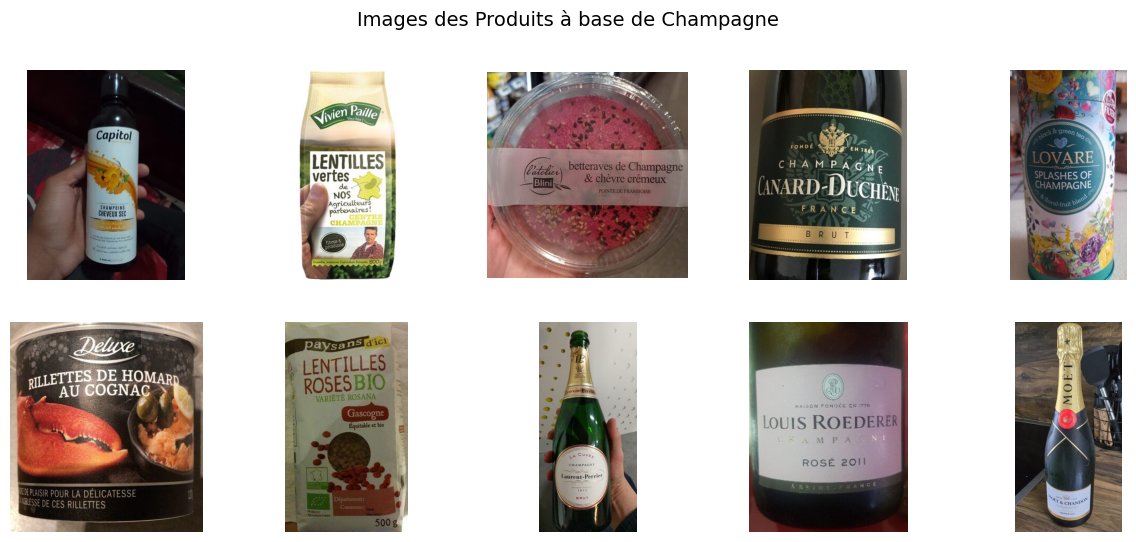

In [ ]:
import matplotlib.pyplot as plt  # Bibliothèque pour afficher les images sous forme de graphique
import requests  # Bibliothèque pour effectuer des requêtes HTTP
from PIL import Image  # Bibliothèque pour manipuler les images
from io import BytesIO  # Permet de lire les données binaires des images


# Fonction pour récupérer les URLs des images des produits

def get_image_urls(products):
    """
    Récupère les URLs des images 'front' pour chaque produit dans la liste.
    
    Args:
        products (list): Liste de produits obtenus depuis l'API Open Food Facts.
    
    Returns:
        list: Liste des URLs des images frontales des produits.
    """
    image_urls = []  # Liste pour stocker les URLs des images

    for product in products:
        # Vérifie si l'image frontale est disponible dans les données du produit
        if "image_url" in product and product["image_url"]:
            image_urls.append(product["image_url"])  # Ajoute l'URL à la liste
    
    return image_urls  # Retourne la liste des URLs



# Requête API pour récupérer les informations sur les produits

url = "https://world.openfoodfacts.org/cgi/search.pl"  # URL de l'API Open Food Facts

params = {
    "search_terms": "champagne",  # Recherche des produits contenant "champagne"
    "fields": "code,product_name,categories,ingredients_text,image_url",  # Champs à récupérer
    "page_size": 10,  # Limite à 10 produits pour cet exemple
    "json": 1  # Format de réponse attendu : JSON
}

response = requests.get(url, params=params)  # Envoi de la requête GET avec les paramètres définis

if response.status_code == 200:  # Vérifie si la requête a réussi (code HTTP 200)
    data = response.json()  # Convertit la réponse en format JSON
    products = data.get("products", [])  # Récupère la liste des produits dans la clé "products"

    if not products:  # Vérifie si aucun produit n'a été trouvé
        print("Aucun produit trouvé.")
    else:
        print(f"{len(products)} produits récupérés.")  # Affiche le nombre de produits récupérés

        # Récupération des URLs des images
        image_urls = get_image_urls(products)  

        if not image_urls:  # Vérifie si aucune URL d'image n'a été trouvée
            print("Aucune image disponible pour ces produits.")
        else:
            print(f"{len(image_urls)} images trouvées.")  # Affiche le nombre d'images trouvées


            # Afficher les images sous forme de grille

            fig, axes = plt.subplots(2, 5, figsize=(15, 6))  
            # Crée une figure avec une grille de 2 lignes et 5 colonnes

            for ax, img_url in zip(axes.flatten(), image_urls):  
                try:
                    response = requests.get(img_url)  
                    img = Image.open(BytesIO(response.content))  
                    ax.imshow(img)  
                    ax.axis("off")  # Masque les axes autour de chaque image
                except Exception as e:
                    ax.text(0.5, 0.5, "Erreur de chargement", fontsize=12, ha="center", va="center")  
                    # Affiche un message d'erreur si une image ne peut pas être chargée

            plt.suptitle("Images des Produits à base de Champagne", fontsize=14)  
            # Titre global de la figure
            plt.show()  
            # Affiche toutes les images dans la grille

else:
    print(f"Erreur API : {response.status_code}. Vérifiez l'URL ou les paramètres.")  
    # Affiche un message d'erreur si la requête API échoue


- Les produits extraits avec la requête API est valide car les produits ci-dessus sont tous des produits à base de champagnes
- La Requête API à été structurée _https://world.openfoodfacts.org/cgi/search.pl_
- L'utilisation  de search_terms et fields à été appliqué
- Nous avons Filtré les catégories et les ingrédients 
- La gestion des erreurs à été appliquée _Gestion d'erreur API (status_code)_
- La requête est extraite dans un fichier format "csv"